In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate

## ODE System Example: Branched Pathway

Let's simulate the ODE system from https://jjj.bio.vu.nl/models/branch5/simulate/

In [9]:
def systemODE(h,t):
    
    S = 10.0 # Assumed fixed (constant)
    P1 = 1.0 # Assumed fixed (constant)
    P2 = 1.0 # Assumed fixed (constant)
    X1 = h[0]
    X2 = h[1]
    X3 = h[2]
    
    K = 1.0
    Keq = 1.0
    V1 = 1.0
    V2 = 1.0
    V3 = 1.0
    V4 = 1.0
    V5 = 1.0
    
    v1 = S*V1*(1-X1/(Keq*S))/(K*(1+S/K+X1/K))
    v2 = X1*V1*(1-X3/(Keq*X1))/(K*(1+X1/K+X3/K))
    v3 = X1*V3*(1-X2/(Keq*X1))/(K*(1+X1/K+X2/K))
    v4 = X1*V4*(1-P1/(Keq*X2))/(K*(1+P1/K+X2/K))
    v5 = X1*V5*(1-P2/(Keq*X3))/(K*(1+P2/K+X3/K))
    
    dX1dt = v1-v2-v3
    dX2dt = v3-v4
    dX3dt = v2-v5
    
    # Finally, return the differentials as an array as well!
    dhdt = [dX1dt,dX2dt,dX3dt]
    return dhdt

In [10]:
t_array = np.linspace(0,10,101)
print(t_array)

[ 0.   0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  0.9  1.   1.1  1.2  1.3
  1.4  1.5  1.6  1.7  1.8  1.9  2.   2.1  2.2  2.3  2.4  2.5  2.6  2.7
  2.8  2.9  3.   3.1  3.2  3.3  3.4  3.5  3.6  3.7  3.8  3.9  4.   4.1
  4.2  4.3  4.4  4.5  4.6  4.7  4.8  4.9  5.   5.1  5.2  5.3  5.4  5.5
  5.6  5.7  5.8  5.9  6.   6.1  6.2  6.3  6.4  6.5  6.6  6.7  6.8  6.9
  7.   7.1  7.2  7.3  7.4  7.5  7.6  7.7  7.8  7.9  8.   8.1  8.2  8.3
  8.4  8.5  8.6  8.7  8.8  8.9  9.   9.1  9.2  9.3  9.4  9.5  9.6  9.7
  9.8  9.9 10. ]


In [11]:
h0 = [1.0,1.0,1.0]

In [12]:
output = scipy.integrate.odeint(systemODE, h0, t_array)

In [13]:
output

array([[1.        , 1.        , 1.        ],
       [1.07209973, 1.00117097, 1.00117097],
       [1.13893051, 1.00439311, 1.00439311],
       [1.20118163, 1.00928224, 1.00928224],
       [1.25942284, 1.01551479, 1.01551479],
       [1.31412858, 1.02281858, 1.02281858],
       [1.36569642, 1.03096515, 1.03096515],
       [1.41446163, 1.03976316, 1.03976316],
       [1.46070869, 1.04905266, 1.04905266],
       [1.50468029, 1.05870031, 1.05870031],
       [1.54658466, 1.06859521, 1.06859521],
       [1.58660142, 1.07864534, 1.07864534],
       [1.62488633, 1.08877459, 1.08877459],
       [1.66157512, 1.09892021, 1.09892021],
       [1.69678671, 1.10903069, 1.10903069],
       [1.73062575, 1.11906389, 1.11906389],
       [1.76318481, 1.12898561, 1.12898561],
       [1.79454616, 1.13876825, 1.13876825],
       [1.82478322, 1.14838975, 1.14838975],
       [1.85396182, 1.1578327 , 1.1578327 ],
       [1.88214124, 1.16708358, 1.16708358],
       [1.90937508, 1.17613212, 1.17613212],
       [1.

Let's plot the output:

Text(0, 0.5, 'Amount')

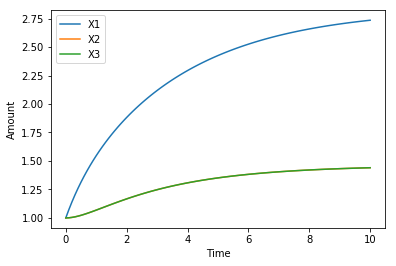

In [15]:
plt.plot(t_array,output[:,0],label='X1')
plt.plot(t_array,output[:,1],label='X2')
plt.plot(t_array,output[:,2],label='X3')
plt.legend()
plt.xlabel('Time')
plt.ylabel('Amount')